In [31]:
%pylab inline
from opt import trainAndEvaluatePrimalModel
import sklearn.metrics as metrics
import kernels

# uncomment in python3
# from importlib import reload
import theano.sandbox.cuda as cuda

import kernels
reload(kernels)
from kernels import *
import utils
reload(utils)
from utils import *
import theano


from theano import function, config, shared, sandbox
import theano.misc.pycuda_init
import theano.tensor as T
from theano import gpuarray
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

Populating the interactive namespace from numpy and matplotlib


In [74]:
DATAPATH = '/data/vaishaal/endive-exp/EGR1_withNegatives/'

In [75]:
XSeqTrain, labelsTrain = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_AC.seq", delim=' ')
XSeqTest, labelsTest = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_B.seq", delim='\t')

In [58]:
AllSeqsTrain = open("genomics_small/allTrainSeqsSampled").readlines()
AllSeqsVal = open("genomics_small/allValSeqs").readlines()

In [62]:
XSeqsTrain = map(lambda x: x.split(",")[0].replace("(", ""), AllSeqsTrain)
XSeqsVal = map(lambda x: x.split(",")[0].replace("(", ""), AllSeqsVal)

In [63]:
labelsTrain = map(lambda x: float(x.split(",")[1].replace("DenseVector(", "").replace(")", "").strip()), AllSeqsTrain)
labelsTest = map(lambda x: float(x.split(",")[1].replace("DenseVector(", "").replace(")", "").strip()), AllSeqsVal)

In [61]:
len(XSeqsVal)

8000

In [64]:
XTrain = convertSeqToMatrix(XSeqsTrain)
XTest = convertSeqToMatrix(XSeqsVal)

In [82]:
D = 4096
gamma = 1.0
W = np.random.randn(D,8*4) * gamma
b = np.zeros

In [ ]:
%time XLiftTest_gpu = generateConvFeatures(XTest, W, batch_size=1024, feature_batch_size=1024, gpu=True)
%time XLiftTrain_gpu = generateConvFeatures(XTrain, W, batch_size=1024, feature_batch_size=1024, gpu=True)


0
('Feature Batch ', 0)
('Data Batch ', 0)
('Data Batch ', 1)
('Data Batch ', 2)
('Data Batch ', 3)
('Data Batch ', 4)
('Data Batch ', 5)
('Data Batch ', 6)


In [85]:
XLiftTrain_gpu.shape

(63277, 8192)

In [67]:
XLiftTest_gpu.shape

(8000, 2048)

('X SHAPE ', (63277, 1200))
Computing XTX
Done Computing XTX


/data/vaishaal/anaconda2/lib/python2.7/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/data/vaishaal/anaconda2/lib/python2.7/site-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1
opt.py:30: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  y = np.eye(max(labels) + 1)[labels]


('Train acc', 0.64192360573352092)
('Test acc', 0.918875)
('Train ROC ', 0.63715505122200033)
('Test ROC ', 0.52222784810126577)


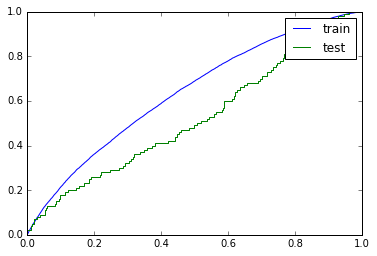

In [42]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XTrain, XTest, labelsTrain, labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

X SHAPE  (16486, 1)
Computing XTX
Done Computing XTX
Train acc 0.499878684945
Test acc 0.503503503504
Train ROC  0.524051692076
Test ROC  0.555350701403


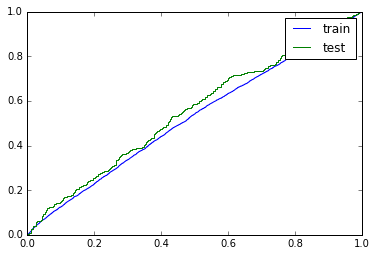

In [107]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

('X SHAPE ', (63277, 8192))
Computing XTX
Done Computing XTX
('Train acc', 0.74045861845536298)
('Test acc', 0.91225000000000001)
('Train ROC ', 0.79965405493996156)
('Test ROC ', 0.77665696202531653)


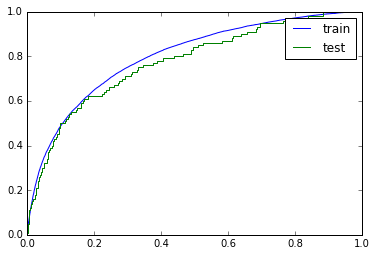

In [98]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_gpu[:,:8192], XLiftTest_gpu[:,:8192],labelsTrain,labelsTest, reg=5e7)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

('X SHAPE ', (16486, 1024))
Computing XTX
Done Computing XTX
('Train acc', 0.78709207812689552)
('Test acc', 0.78678678678678682)
('Train ROC ', 0.87070864549246285)
('Test ROC ', 0.8784168336673347)


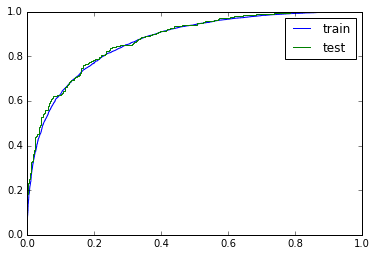

In [38]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest, reg=0)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

In [113]:
cuda

<module 'theano.sandbox.cuda' from '/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py'>

In [21]:
XLiftTest_gpu

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])